In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cd=pd.read_csv('C:\\practice\\Placement_Data_Full_Class.csv')
cd.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [36]:
cd.describe(include="all")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


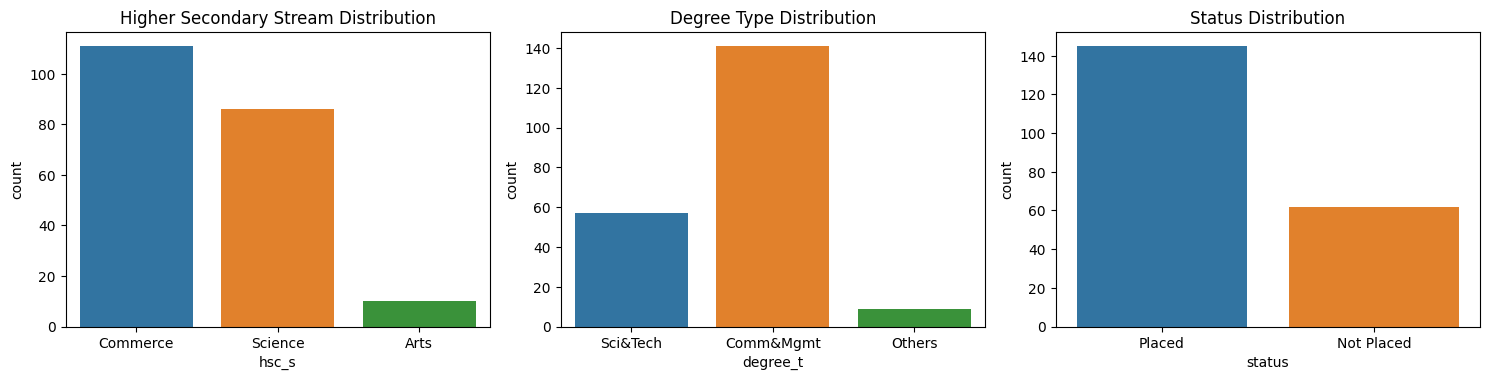


Evaluating Logistic Regression...
Accuracy: 0.76
Confusion Matrix:
[[ 5  5]
 [ 5 27]]

Evaluating Random Forest...
Accuracy: 0.83
Confusion Matrix:
[[ 6  4]
 [ 3 29]]

Evaluating Support Vector Machine...
Accuracy: 0.76
Confusion Matrix:
[[ 4  6]
 [ 4 28]]

Evaluating K-Nearest Neighbors...
Accuracy: 0.79
Confusion Matrix:
[[ 5  5]
 [ 4 28]]


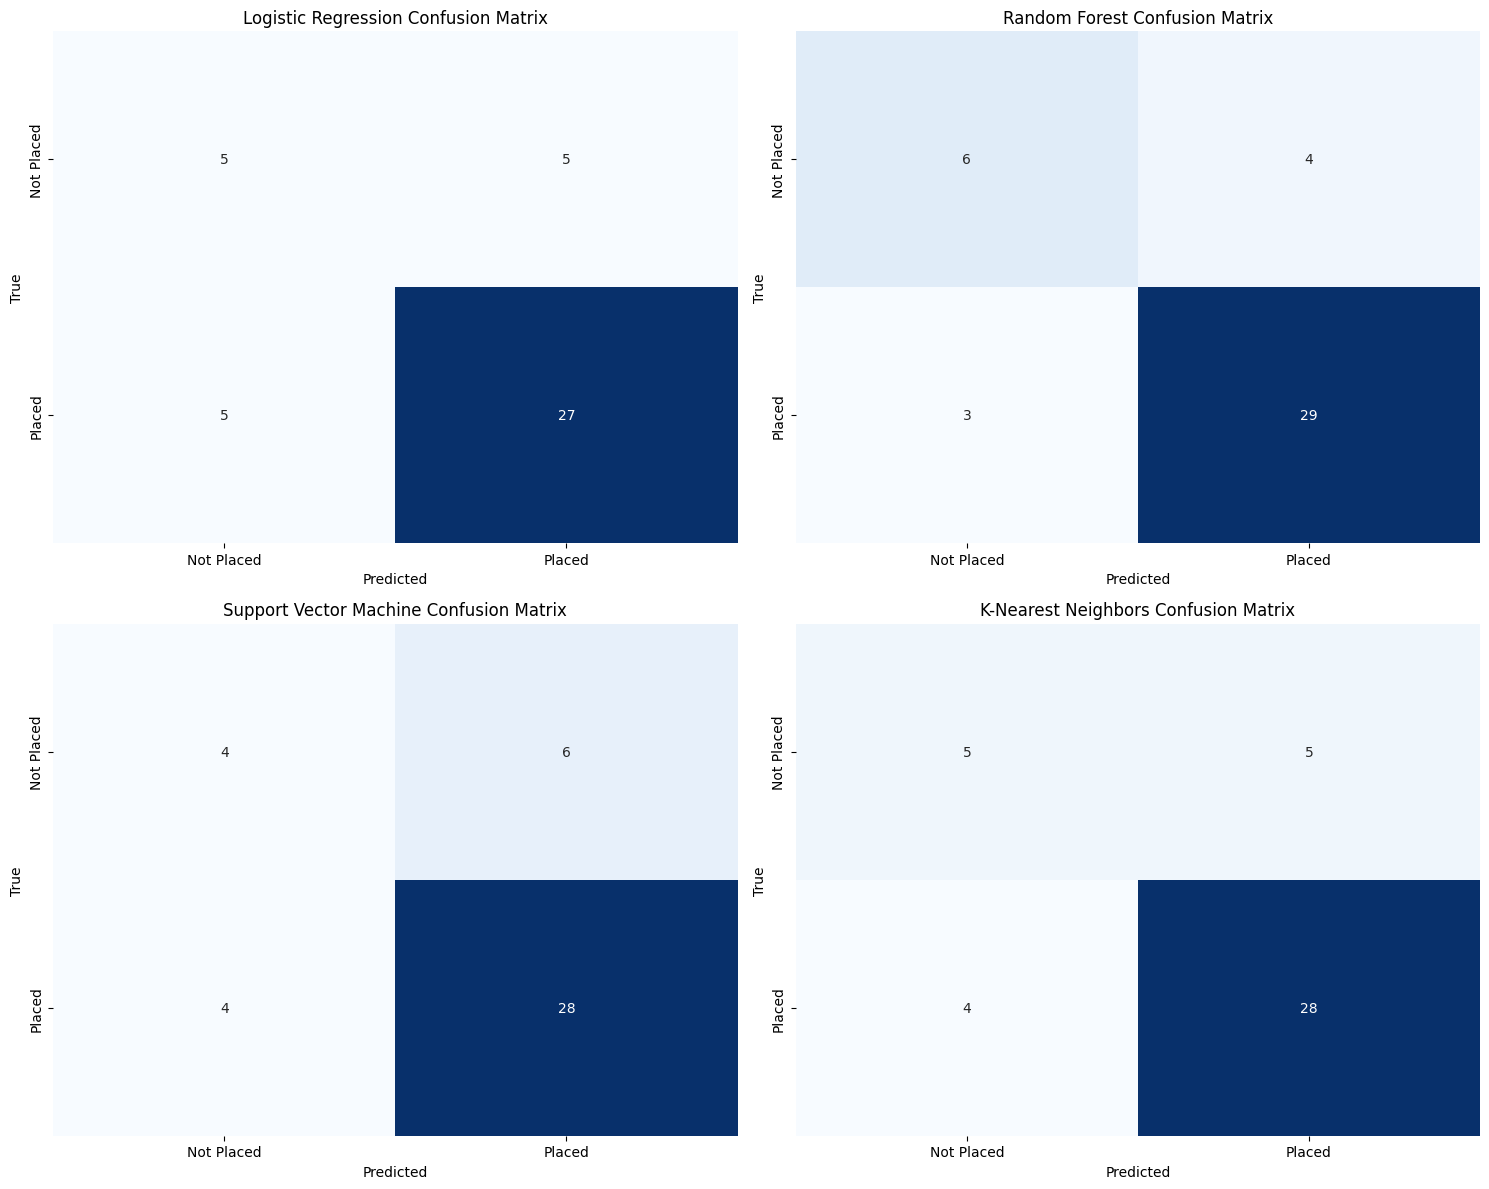

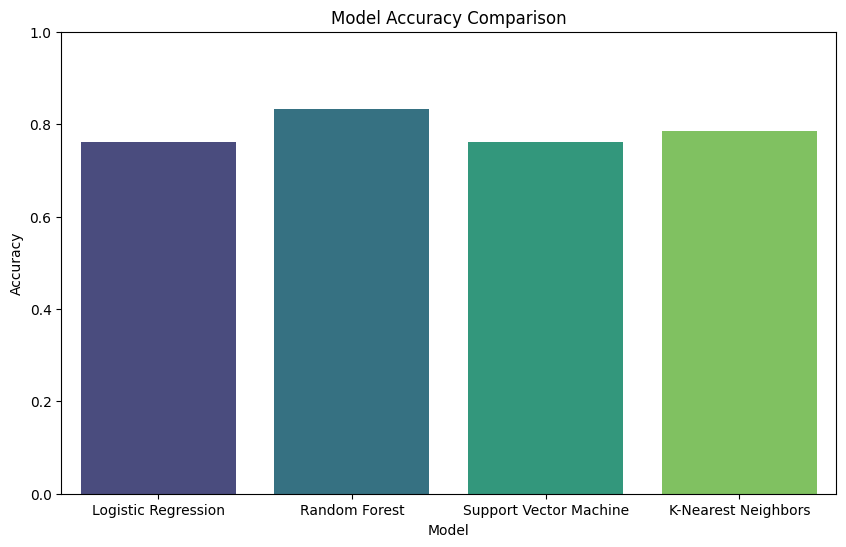

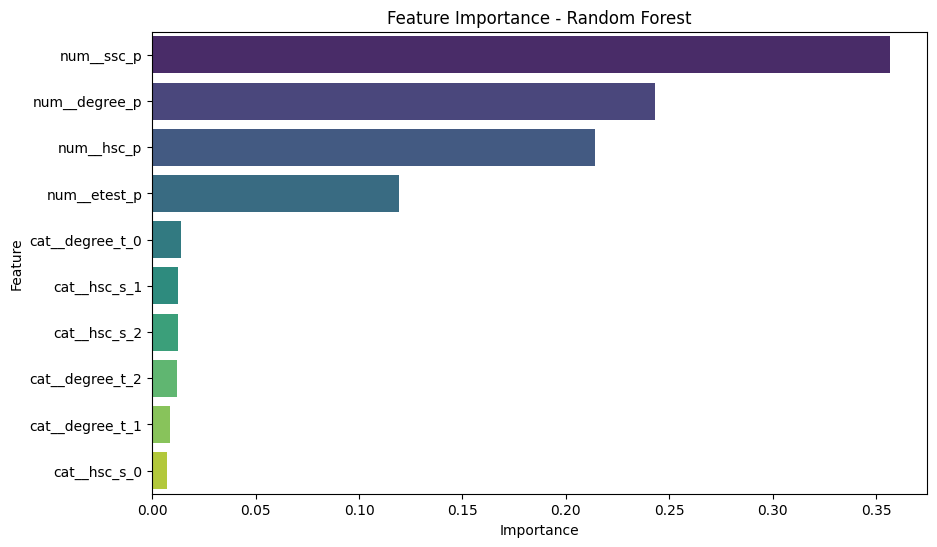

              precision    recall  f1-score   support

  Not Placed       0.60      0.60      0.60        10
      Placed       0.88      0.88      0.88        32

    accuracy                           0.81        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.81      0.81      0.81        42

AUC-ROC: 0.8625
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Cross-Validation Accuracy: 0.8242424242424242
Model saved as random_forest_pipeline.pkl


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Sample data loading (Replace this with your actual data loading method)
# cd = pd.read_csv('your_data.csv')

# Assuming cd is your DataFrame, we will first clean the data

cde = cd.copy()

# Filling missing values in the 'salary' column (if needed)
cde['salary'].fillna(value=0, inplace=True)

# Drop the unwanted columns
cde.drop(['sl_no', 'ssc_b', 'hsc_b', 'mba_p', 'gender', 'workex', 'specialisation', 'salary'], axis=1, inplace=True)

# Outlier removal for 'hsc_p' based on IQR
q1 = cde['hsc_p'].quantile(0.25)
q3 = cde['hsc_p'].quantile(0.75)
iqr = q3 - q1

# Filter out the outliers based on the IQR
filter = (cde['hsc_p'] >= q1 - 1.5 * iqr) & (cde['hsc_p'] <= q3 + 1.5 * iqr)
cd_filtered = cde.loc[filter]

# Create subplots for count plots (categorical variables)
plt.figure(figsize=(15, 7))

# Countplot for 'hsc_s' (Higher Secondary Stream)
plt.subplot(231)
sns.countplot(x='hsc_s', data=cd_filtered)
plt.title('Higher Secondary Stream Distribution')

# Countplot for 'degree_t' (Degree Type)
plt.subplot(232)
sns.countplot(x='degree_t', data=cd_filtered)
plt.title('Degree Type Distribution')

# Countplot for 'status' (Status: Placed/Not Placed)
plt.subplot(233)
sns.countplot(x='status', data=cd_filtered)
plt.title('Status Distribution')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Label encoding for categorical columns
obj_col = ['hsc_s', 'degree_t']
le = LabelEncoder()
for col in obj_col:
    cd_filtered[col] = le.fit_transform(cd_filtered[col])

# Splitting the dataset into features and target variable
X = cd_filtered.drop('status', axis=1)  # Features (excluding target 'status')
y = cd_filtered['status']  # Target variable ('status')

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['ssc_p', 'hsc_p', 'degree_p', 'etest_p']),  # Numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['hsc_s', 'degree_t'])  # Categorical columns to encode
    ])

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store predictions for each classifier
predictions = {}

# Store accuracy scores for plotting
accuracy_scores = []

# Create subplots for confusion matrices
plt.figure(figsize=(15, 12))

for i, (classifier_name, classifier) in enumerate(classifiers.items(), 1):
    print(f"\nEvaluating {classifier_name}...")
    
    # Create a pipeline for each classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing step
        ('classifier', classifier)  # Model
    ])
    
    # Train the model using the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions[classifier_name] = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions[classifier_name])
    accuracy_scores.append(accuracy)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions[classifier_name])
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix as heatmap
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=["Not Placed", "Placed"], yticklabels=["Not Placed", "Placed"])
    plt.title(f"{classifier_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

# Display confusion matrix plots
plt.tight_layout()
plt.show()

# Accuracy Comparison - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(classifiers.keys()), y=accuracy_scores, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim([0, 1])
plt.show()

# Random Forest Model
rf_model = RandomForestClassifier()
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Fit the pipeline to capture the transformed feature names
pipeline_rf.fit(X_train, y_train)

# Extract the feature names after preprocessing
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances
feature_importance = pipeline_rf.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importance - Random Forest')
plt.show()

# Evaluate the model performance
from sklearn.metrics import classification_report, roc_auc_score

y_pred = pipeline_rf.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_prob = pipeline_rf.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    pipeline_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Cross-Validation Accuracy
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

# Save the final model
joblib.dump(best_model, 'pipeline.pkl')
print("Model saved as random_forest_pipeline.pkl")
